In [50]:
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from src.skycycles.model import CyclesGraph
from src.skycycles.setups import generate_graphs_by_attractiveness_grid, run_experiments, visualize_graphs, generate_gigagrafs_by_attractiveness_grid

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Two cycles
* Attractive: +k and +10k with various scaling factor k
* But, max_flow in lifts: 0.5 and 0.05   

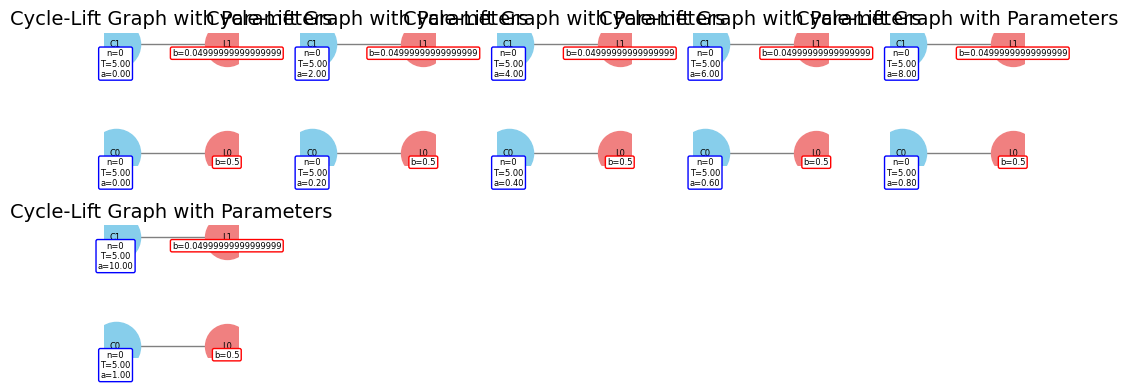

In [2]:
graphs = generate_graphs_by_attractiveness_grid(start=0, stop = 1, step = 0.2)


visualize_graphs(graphs, figsize=(2, 2), cols=5)

Graph 5: 100%|██████████| 10/10 [00:01<00:00,  5.52it/s]


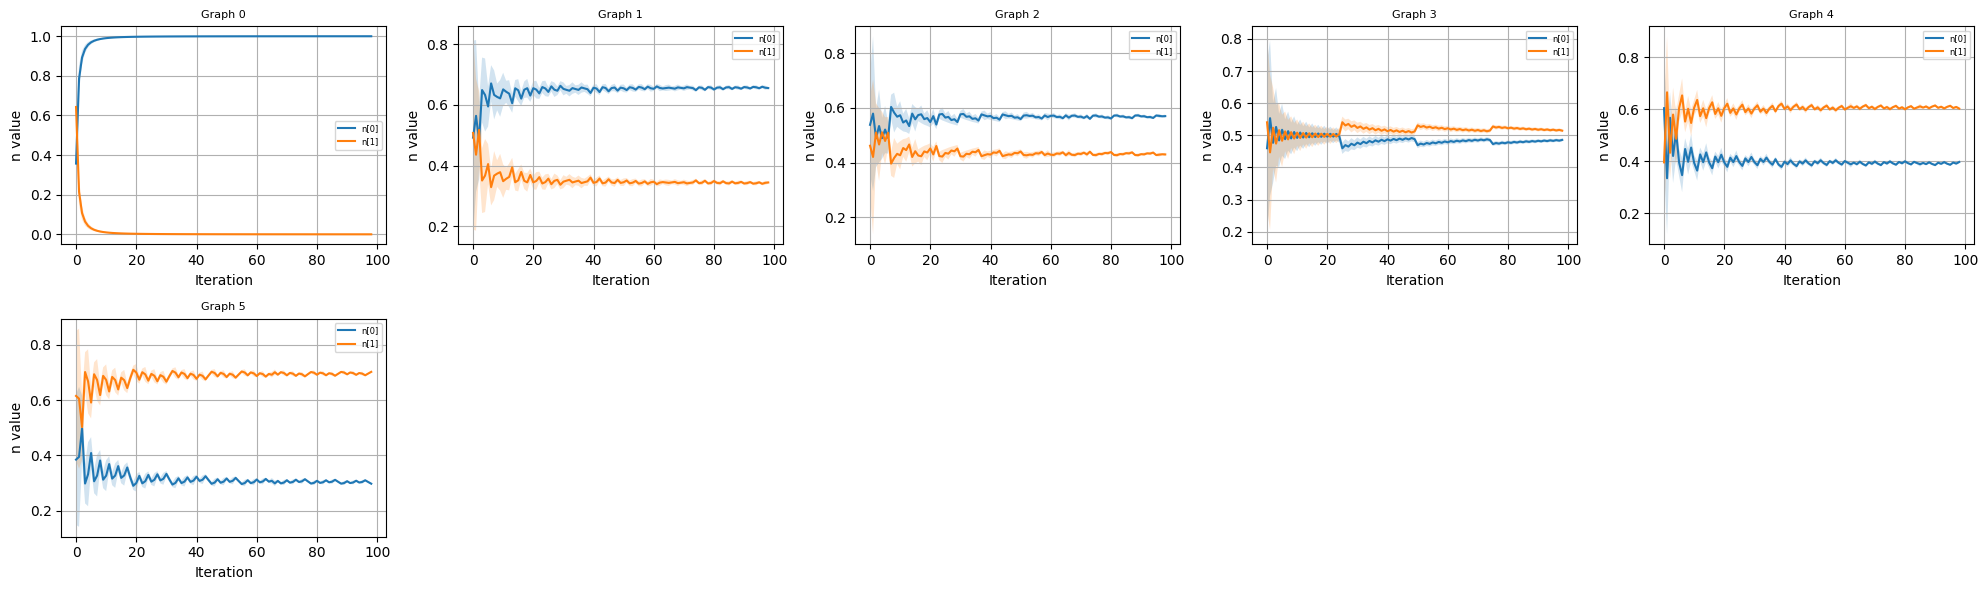

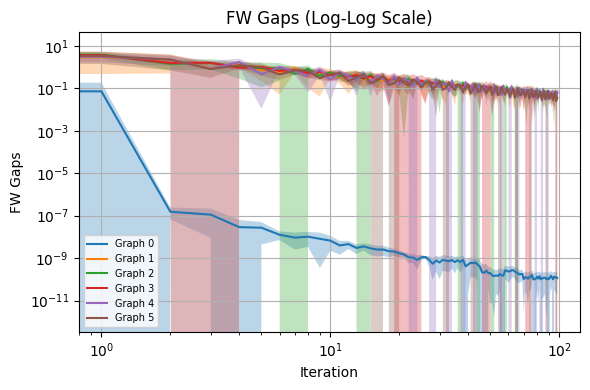

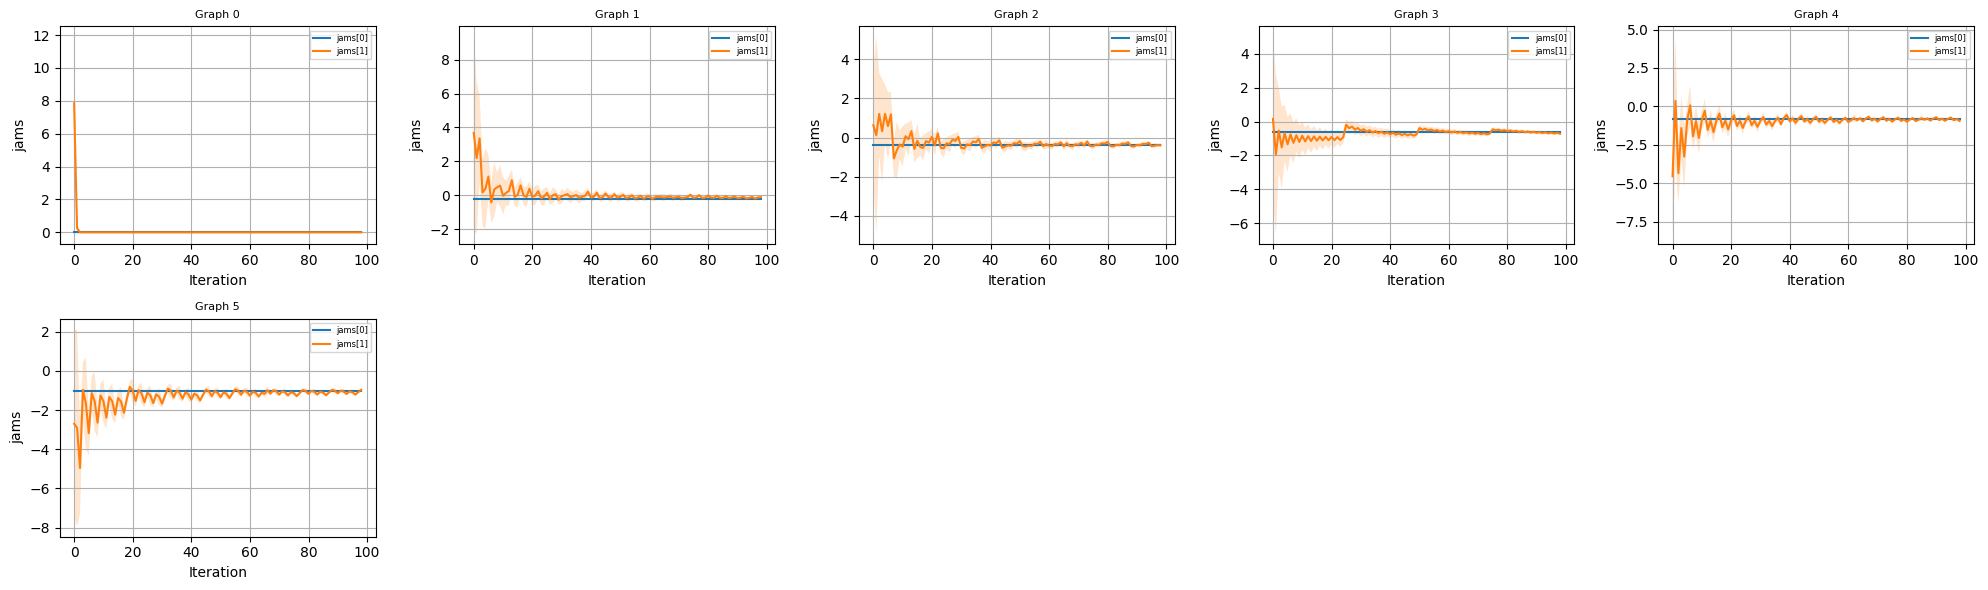

In [111]:
def frank_wolfe_wrapper(graph, max_iters=100, method='cvxpy'):
    return graph.frank_wolfe(max_iters=max_iters, tqdm_use=False, method=method)

run_experiments(graphs, frank_wolfe_wrapper, N_samples=10, max_iters=100)


## Graph with 5 cycles

* attractiveness: k, 2k, 3k, 4k, 5k
* count of lifts: 1, 2, 3, 4, 5
* lifts max flows: 0.06 * [ 5, 4, 3, 2, 1]

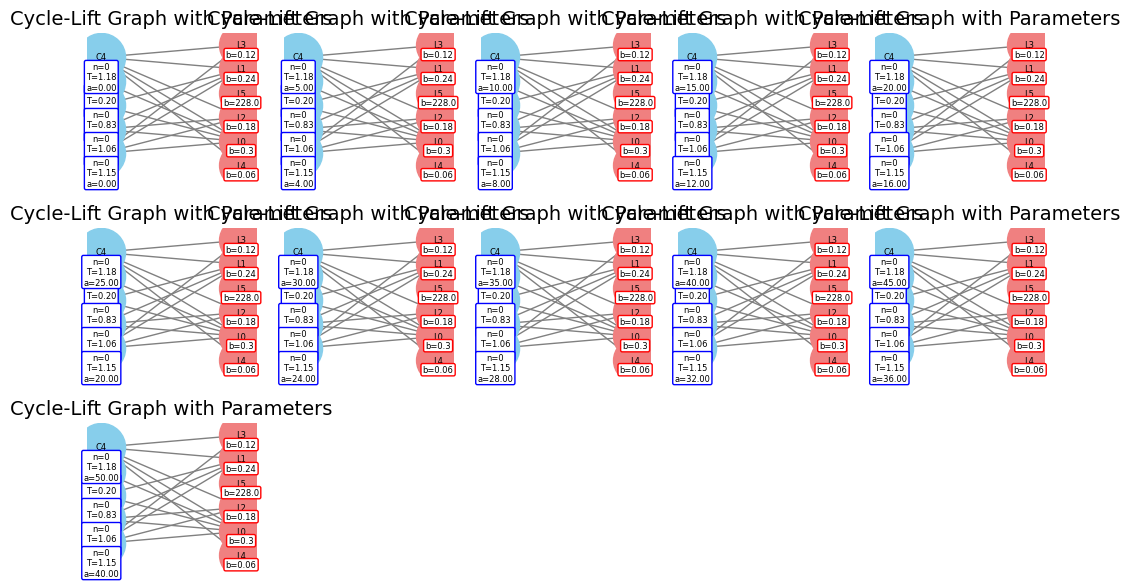

In [3]:
gigagraphs = generate_gigagrafs_by_attractiveness_grid(start=0, stop = 10, step = 1)

visualize_graphs(gigagraphs, figsize=(2, 2), cols=5)

Graph 6:  20%|██        | 2/10 [00:01<00:04,  1.76it/s]/Users/igoreshka/Desktop/Skymodeling/.venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Graph 10: 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]


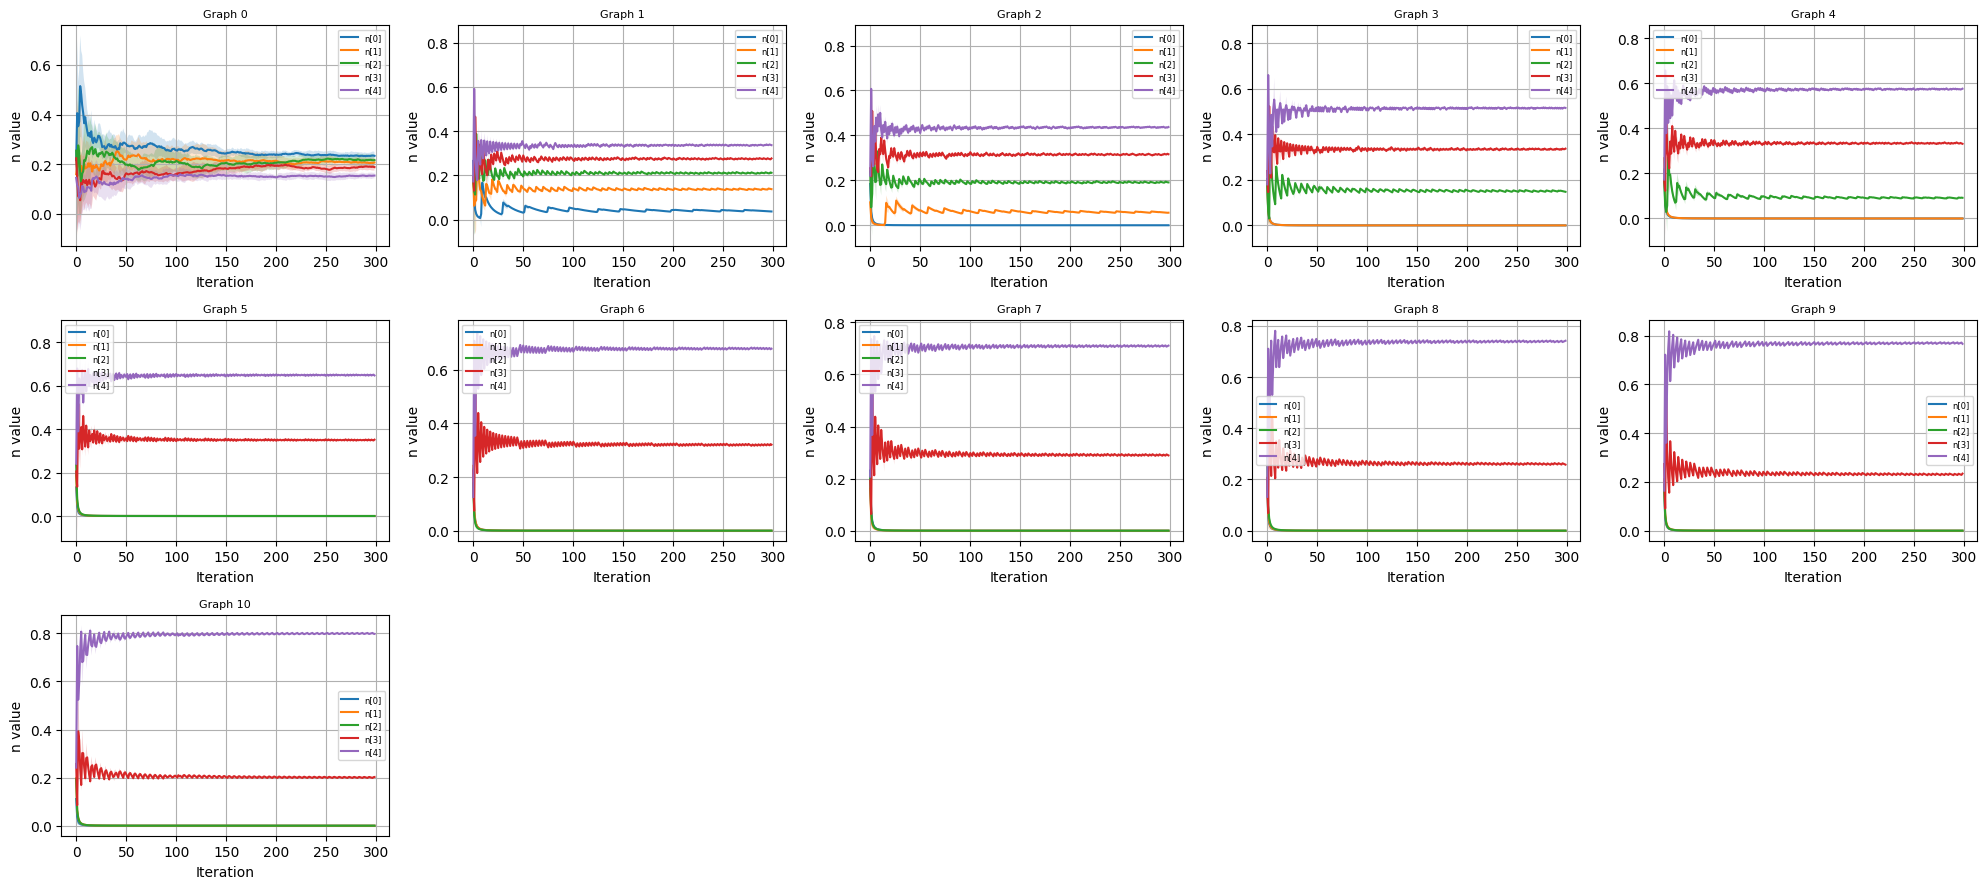

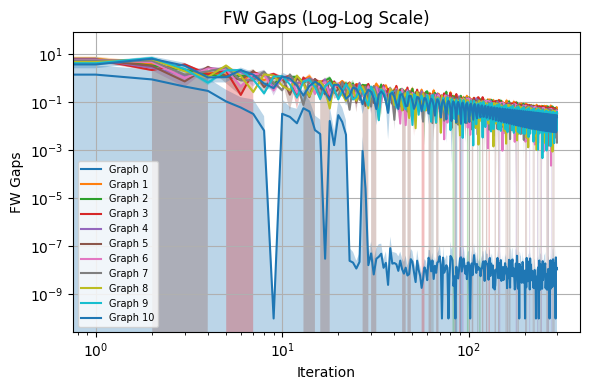

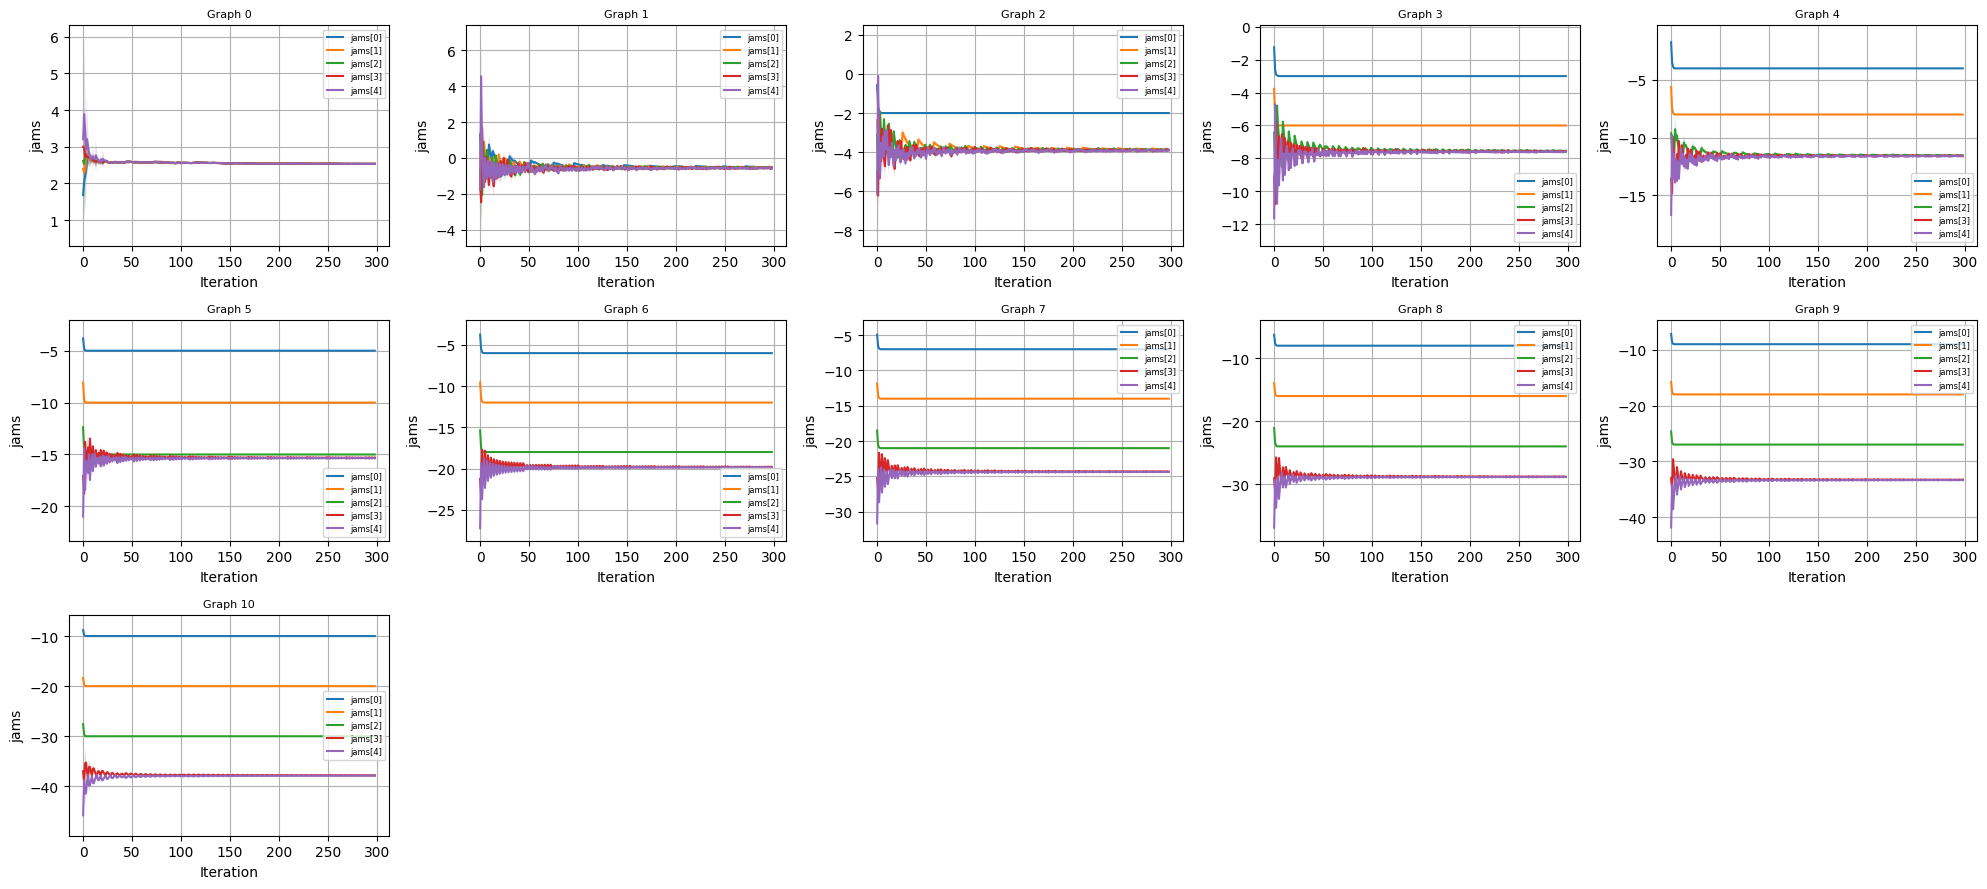

In [165]:
run_experiments(gigagraphs, frank_wolfe_wrapper, N_samples=10, max_iters=300)


## Extragradient

Graph 4: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]


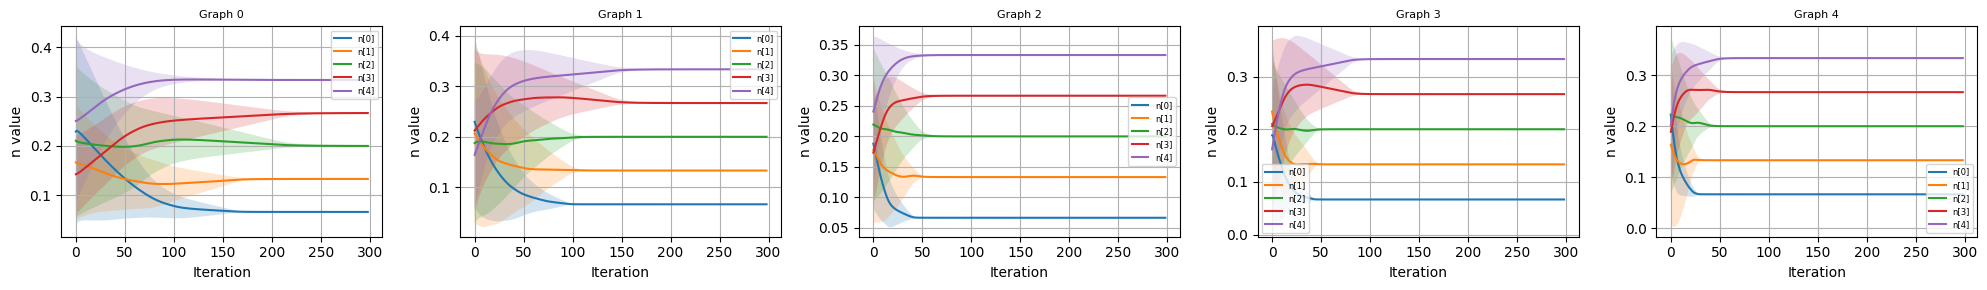

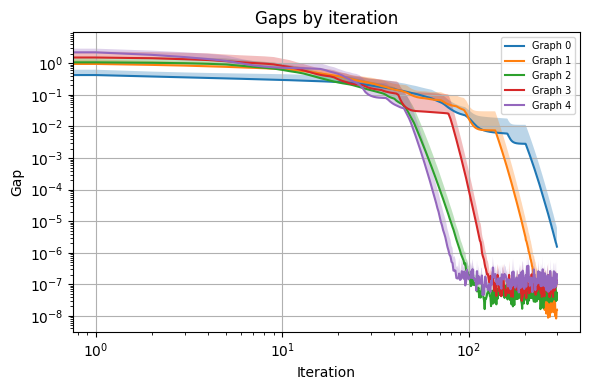

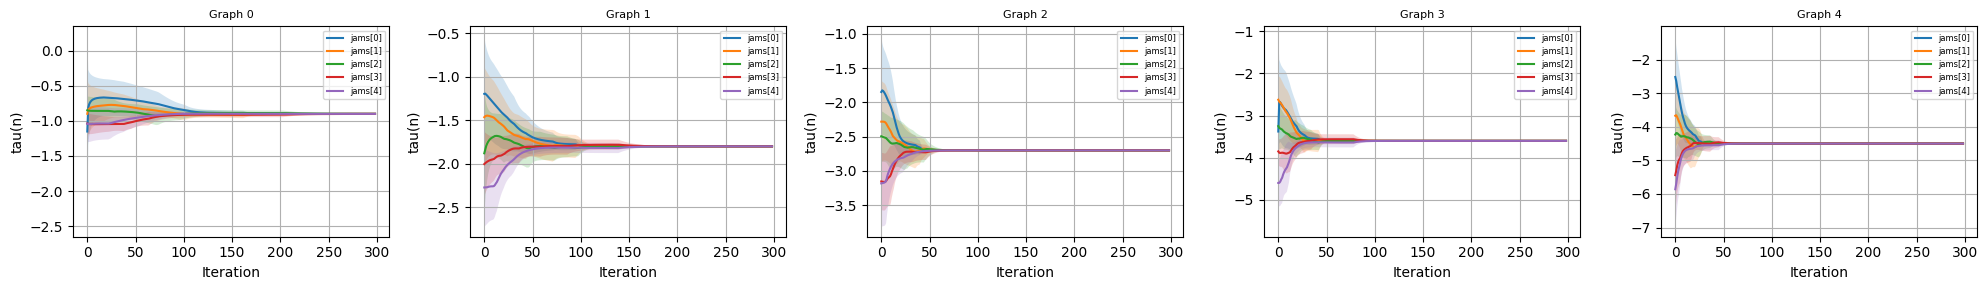

In [51]:

def extragradient_wrapper(graph, max_iters=100, method='cvxpy'):
    return graph.extragradient(max_iters=max_iters, tqdm_use=False, method=method)

run_experiments(gigagraphs[1:6], extragradient_wrapper, N_samples=10, max_iters=300)


## Отладка

In [36]:
graph = gigagraphs[1]

graph.lift_cycle_matrix , graph.max_lift_flow, graph.free_travel_times

(array([[1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0]]),
 array([3.00e-01, 2.40e-01, 1.80e-01, 1.20e-01, 6.00e-02, 2.28e+02]),
 array([0.2       , 0.83212056, 1.06466472, 1.15021293, 1.18168436]))

In [38]:
for method in ['cvxpy' ]:
    n , FW_gaps, qualities, n_values, t_array, f_array = graph.extragradient( max_iters=1000, tol=1e-6, method = method)
    FW_gaps = np.array(FW_gaps)
    n_values = np.array(n_values) 
    t_array = np.array(t_array)
    f_array = np.array(f_array)
    qualities = np.array(qualities)
    n_values.shape , t_array.shape , f_array.shape
    print(n_values[-1])

[0.06094794 0.14782928 0.21073593 0.26482392 0.31566292]


In [39]:
n_values[-1]

array([0.06094794, 0.14782928, 0.21073593, 0.26482392, 0.31566292])

In [ ]:
FW_gaps

array([7.69509960e-01, 7.46366143e-01, 7.17975693e-01, 6.91114661e-01,
       6.65786975e-01, 6.42256574e-01, 6.19913748e-01, 5.99024823e-01,
       5.79521028e-01, 5.61288353e-01, 5.44209557e-01, 5.28475518e-01,
       5.13816739e-01, 5.00297816e-01, 4.87881106e-01, 4.76472720e-01,
       4.66097947e-01, 4.56597405e-01, 4.47988218e-01, 4.40149959e-01,
       4.33050494e-01, 4.26562693e-01, 4.20008225e-01, 4.00449106e-01,
       3.82705080e-01, 3.66524926e-01, 3.51700542e-01, 3.38085262e-01,
       3.25283639e-01, 3.12607903e-01, 3.01143212e-01, 2.90759678e-01,
       2.81310663e-01, 2.72688582e-01, 2.64785992e-01, 2.57599797e-01,
       2.50969690e-01, 2.44952487e-01, 2.39452648e-01, 2.33534591e-01,
       2.26862605e-01, 2.21105838e-01, 2.16045883e-01, 2.11812240e-01,
       2.08186391e-01, 2.05165552e-01, 1.86925821e-01, 1.67678692e-01,
       1.51593083e-01, 1.38218431e-01, 1.26935992e-01, 1.17369948e-01,
       1.09285975e-01, 1.02381362e-01, 9.65018268e-02, 9.14567220e-02,
      

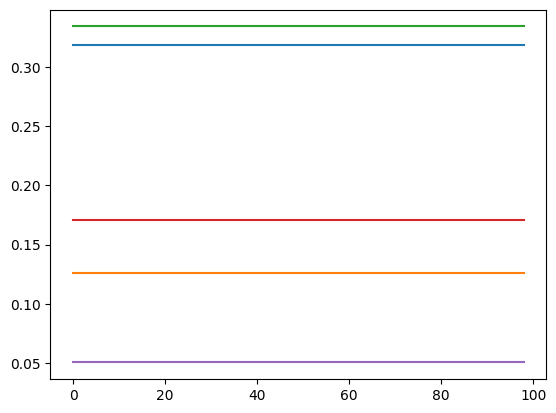

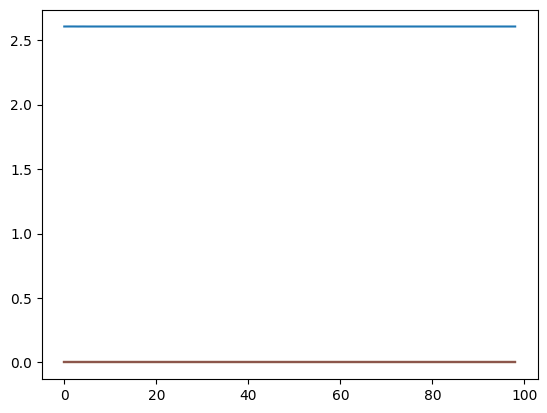

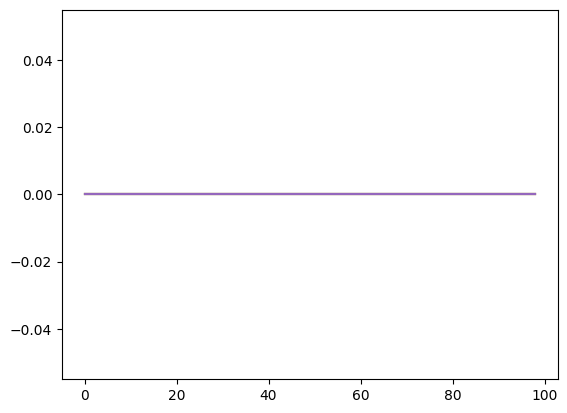

In [20]:
plt.plot(n_values)
plt.show()
plt.plot(t_array)
plt.show()
plt.plot(qualities)
plt.show()

In [153]:
t_array

array([[1.33504429e-01, 2.33030064e+00, 0.00000000e+00, 1.22029721e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.90316463e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.95305506e+00, 0.00000000e+00, 0.00000000e+00, 1.86919140e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.70123642e+00, 0.00000000e+00, 1.43355094e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.71798896e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.54723179e+00, 0.00000000e+00, 1.91999321e-07, 1.04092180e-01,
        0.00000000e+00, 0.00000000e+00],
       [2.73742634e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.68839610e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.61337791e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 

In [154]:
Theta = graph.lift_cycle_matrix.T 

t_array @ Theta

array([[0.13350443, 2.46380507, 2.46380507, 3.68410228, 3.68410228],
       [2.90316463, 2.90316463, 2.90316463, 2.90316463, 2.90316463],
       [1.95305506, 1.95305506, 1.95305506, 3.82224646, 3.82224646],
       [1.70123642, 1.70123642, 3.13478736, 3.13478736, 3.13478736],
       [2.71798896, 2.71798896, 2.71798896, 2.71798896, 2.71798896],
       [2.54723179, 2.54723179, 2.54723198, 2.65132416, 2.65132416],
       [2.73742634, 2.73742634, 2.73742634, 2.73742634, 2.73742634],
       [2.6883961 , 2.6883961 , 2.6883961 , 2.6883961 , 2.6883961 ],
       [2.61337791, 2.61337791, 2.61337791, 2.61337791, 2.61337791],
       [2.53944404, 2.53944404, 2.53944415, 2.53944415, 2.53944434],
       [2.65336781, 2.65336781, 2.65336781, 2.65336781, 2.65336781],
       [2.6004202 , 2.6004202 , 2.6004202 , 2.6004202 , 2.6004202 ],
       [2.5866605 , 2.5866605 , 2.5866605 , 2.5866605 , 2.5866605 ],
       [2.54814708, 2.54814708, 2.54814708, 2.54814708, 2.54814708],
       [2.5425373 , 2.54253741, 2.

In [140]:
t_array @ Theta

array([[0.03416633, 2.63517469, 2.63517473, 2.63517474, 4.41775842],
       [2.89886173, 2.89886173, 2.89886174, 2.89886174, 2.89886176],
       [3.01961297, 3.01961298, 3.01961298, 3.01961298, 3.01961299],
       [3.06584826, 3.06584826, 3.06584826, 3.06584826, 3.06584827],
       [3.08862744, 3.08862745, 3.08862745, 3.08862746, 3.08862747],
       [3.10144704, 3.10144704, 3.10144705, 3.10144705, 3.10144706],
       [3.10947838, 3.10947838, 3.10947838, 3.10947838, 3.10947838],
       [3.11479424, 3.11479424, 3.11479424, 3.11479424, 3.11479425],
       [3.11853744, 3.11853744, 3.11853744, 3.11853744, 3.11853745],
       [3.12123258, 3.12123258, 3.12123258, 3.12123259, 3.12123259],
       [3.12330761, 3.12330761, 3.12330761, 3.12330762, 3.12330763],
       [3.12472355, 3.12472355, 3.12472356, 3.12472356, 3.12472357],
       [3.12601946, 3.12601946, 3.12601946, 3.12601946, 3.12601947],
       [3.12702975, 3.12702975, 3.12702976, 3.12702976, 3.12702976],
       [3.12773589, 3.12773589, 3.

In [141]:
np.argmin(np.array([2,1,1,1]), )

np.int64(1)

In [161]:
f_array[-1]

array([0.09353853, 0.06998346, 0.05825064, 0.04458917, 0.0336382 ])

In [164]:
np.array(graph.max_lift_flow , dtype = np.float64)

array([3.00e-01, 2.40e-01, 1.80e-01, 1.20e-01, 6.00e-02, 2.28e+02])

In [160]:
np.cumsum( f_array[-1][::-1] )

array([0.0336382 , 0.07822737, 0.13647801, 0.20646147, 0.3       ])

In [155]:
n_values / f_array - graph.free_travel_times - t_array @ Theta

array([[-1.94932550e-05, -7.09532435e-05, -2.51939536e-04,
         1.58243170e-04, -3.13947442e-04],
       [-5.07765943e-06,  3.74142758e-04, -6.00957639e-04,
        -4.77991196e-05, -1.64187314e-04],
       [ 4.16893301e-05, -2.44046954e-04, -2.91242794e-04,
        -1.38437449e-05, -3.51525351e-04],
       [-3.77196594e-05, -2.20593207e-04, -5.98296145e-05,
         1.05145118e-04, -5.35394393e-04],
       [ 4.59250311e-05,  5.42361023e-04,  2.34568378e-04,
         8.40824609e-05,  1.62316608e-03],
       [-1.51305243e-04, -3.02618710e-04, -1.25722122e-04,
        -1.00817560e-05, -1.60083376e-04],
       [-2.46359428e-06, -7.55911591e-05, -2.82772433e-04,
         1.30038255e-04, -1.80211055e-04],
       [ 4.17177474e-05, -3.03984880e-05,  3.57405931e-05,
         1.51327180e-04, -2.32067496e-04],
       [-4.77069805e-06,  3.65349855e-05, -5.78655596e-05,
        -5.81432989e-05, -4.42401542e-04],
       [-2.25361170e-04, -4.00272068e-04, -2.53171189e-04,
        -3.64630132e-04

In [144]:
n_array/f_array 

NameError: name 'n_array' is not defined